In [18]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [19]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)


<Axes: xlabel='x1', ylabel='x2'>

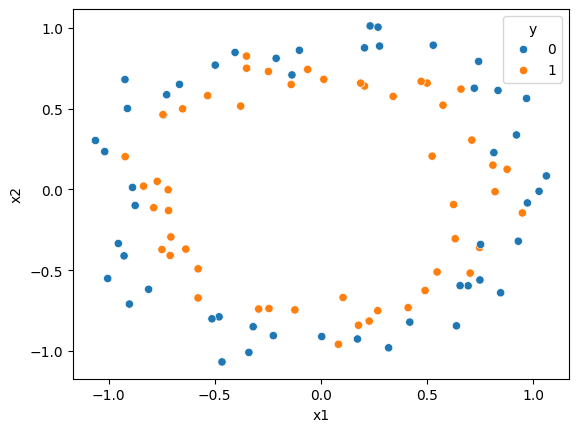

In [20]:
df = pd.DataFrame({'x1':X[:,0], 'x2':X[:,1], 'y':y})
sns.scatterplot(x='x1', y='x2', hue='y', data=df)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [22]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

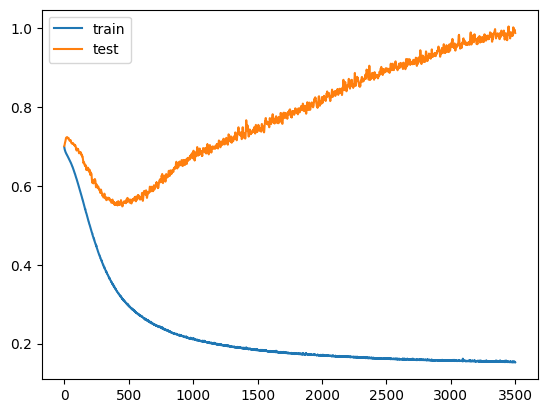

In [28]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


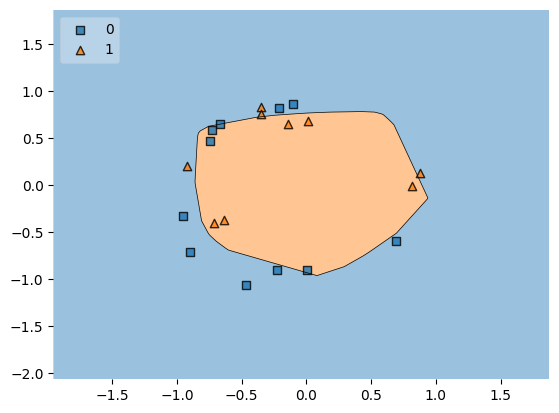

In [29]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [44]:
model1 = Sequential()

model1.add(Dense(256, input_dim=2, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=100,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=20
)

In [47]:
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.5102 - loss: 0.6888 - val_accuracy: 0.4000 - val_loss: 0.7007
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5188 - loss: 0.6890 - val_accuracy: 0.4000 - val_loss: 0.7025
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5719 - loss: 0.6836 - val_accuracy: 0.4000 - val_loss: 0.7034
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5406 - loss: 0.6861 - val_accuracy: 0.4000 - val_loss: 0.7047
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5492 - loss: 0.6892 - val_accuracy: 0.4000 - val_loss: 0.7058
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5781 - loss: 0.6820 - val_accuracy: 0.4000 - val_loss: 0.7075
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5703 - loss: 0.6843 - val_accuracy: 0.4000 - val_loss: 0.7092
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5977 - loss: 0.6811 - val_accuracy: 0.4000 - 

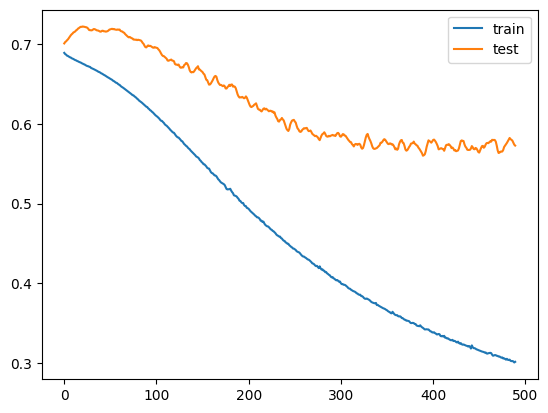

In [48]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


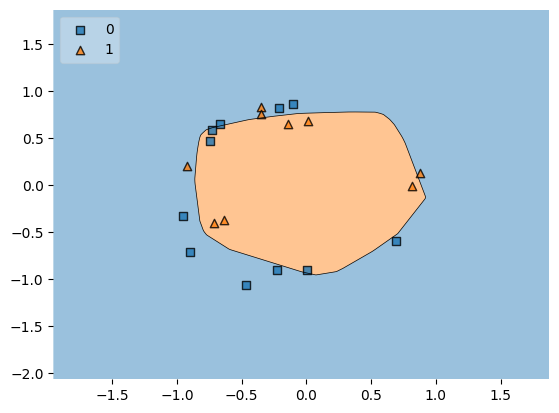

In [49]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

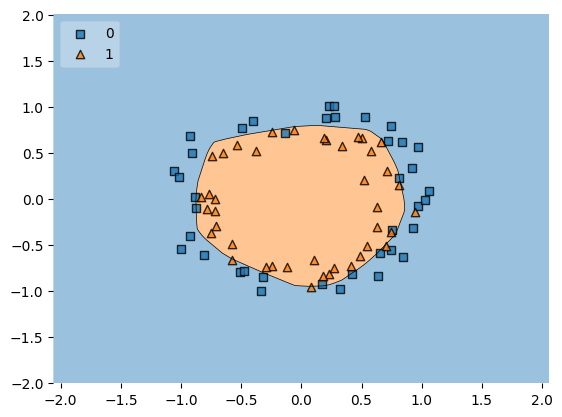

In [50]:
plot_decision_regions(X_train,y_train.ravel(), clf = model1, legend=2)